`$ pip install yahoo-finance`  

[Yahoo Finance Package](https://github.com/lukaszbanasiak/yahoo-finance)

Inspired in [Pandas Talib](https://github.com/femtotrader/pandas_talib/blob/master/pandas_talib/__init__.py)

In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from yahoo_finance import Share
from pprint import pprint
from datetime import datetime, timedelta
from datetime import date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
style.use('fivethirtyeight')

In [4]:
# 5 years rolling to date
days_to_subtract = 133

today_is = datetime.today()

five_years_to_date_is = datetime.today() - timedelta(days=days_to_subtract)

print ("Today is: ") + str(today_is.date()) + (" and 5 Years to Date is: ") + str(five_years_to_date_is.date())

Today is: 2017-05-14 and 5 Years to Date is: 2017-01-01


In [5]:
wege = Share('WEGE3.SA')
# gerdau = Share('GGBR4.SA')
# natura = Share('NATU3.SA')
# ccr = Share('CCRO3.SA')
# marcopolo = Share('POMO4.SA')

In [6]:
hoje = str(today_is.year) + "/" + str(today_is.month) + "/" + str(today_is.day) 
cinco_anos = str(five_years_to_date_is.year) + "/" + str(five_years_to_date_is.month) + "/" + str(five_years_to_date_is.day) 

hoje = date(*map(int, hoje.split('/')))
cinco_anos = date(*map(int, cinco_anos.split('/')))

hoje = str(hoje)
cinco_anos = str(cinco_anos)

In [7]:
df_wege = wege.get_historical(cinco_anos, hoje)
# df_gerdau = gerdau.get_historical(cinco_anos, hoje)
# df_natura = natura.get_historical(cinco_anos, hoje)
# df_ccr = ccr.get_historical(cinco_anos, hoje)
# df_marcopolo = marcopolo.get_historical(cinco_anos, hoje)

In [8]:
df_wege = json.dumps(df_wege)
# df_gerdau = json.dumps(df_gerdau)
# df_natura = json.dumps(df_natura)
# df_ccr = json.dumps(df_ccr)
# df_marcopolo = json.dumps(df_marcopolo)

In [9]:
df_wege = pd.read_json(df_wege)
# df_gerdau = pd.read_json(df_gerdau)
# df_natura = pd.read_json(df_natura)
# df_ccr = pd.read_json(df_ccr)
# df_marcopolo = pd.read_json(df_marcopolo)

In [10]:
df_wege = df_wege.sort_values(['Date'], ascending=[1])

In [11]:
n = 15

In [12]:
def MA(df, n):
    """
    Moving Average
    """
    result = df['Close'].rolling(window=n,center=False).mean()
    return (result)

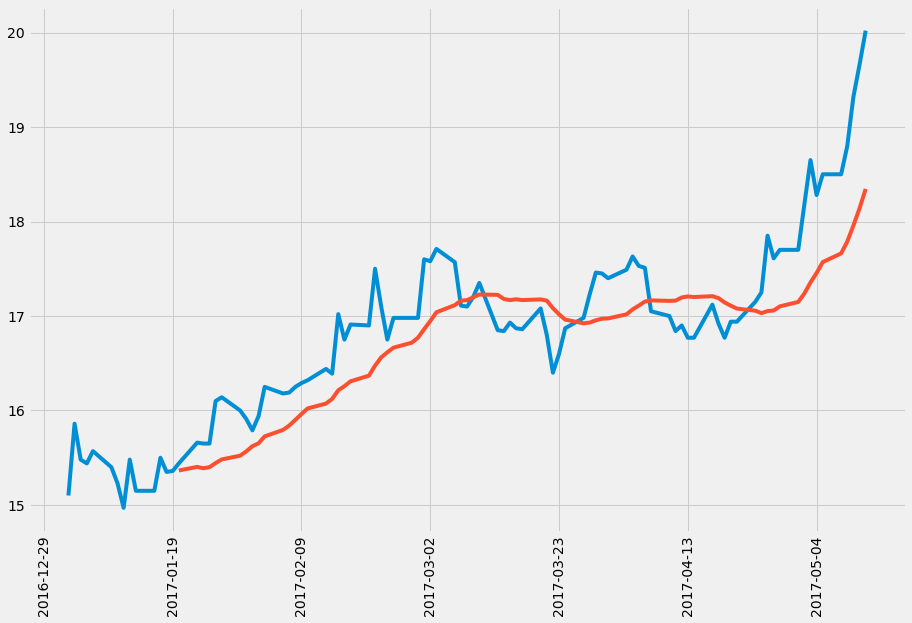

In [13]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, df_wege['Close']
         ,df_wege.Date, MA(df_wege, n)
        )

In [14]:
def BBANDS(df, n):
    """
    Bollinger Bands
    """
    MA = df['Close'].rolling(window=n,center=False).mean()
    MSD = df['Close'].rolling(window=n,center=False).std()
    
    UpperBollinger = MA + (MSD * 2)
    LowerBollinger = MA - (MSD * 2)

    B1 = pd.Series(UpperBollinger, name='UpperBollinger_' + str(n))
    B2 = pd.Series(LowerBollinger, name='LowerBollinger_' + str(n))
    
    result = pd.DataFrame([B1, B2]).transpose()
    return (result)

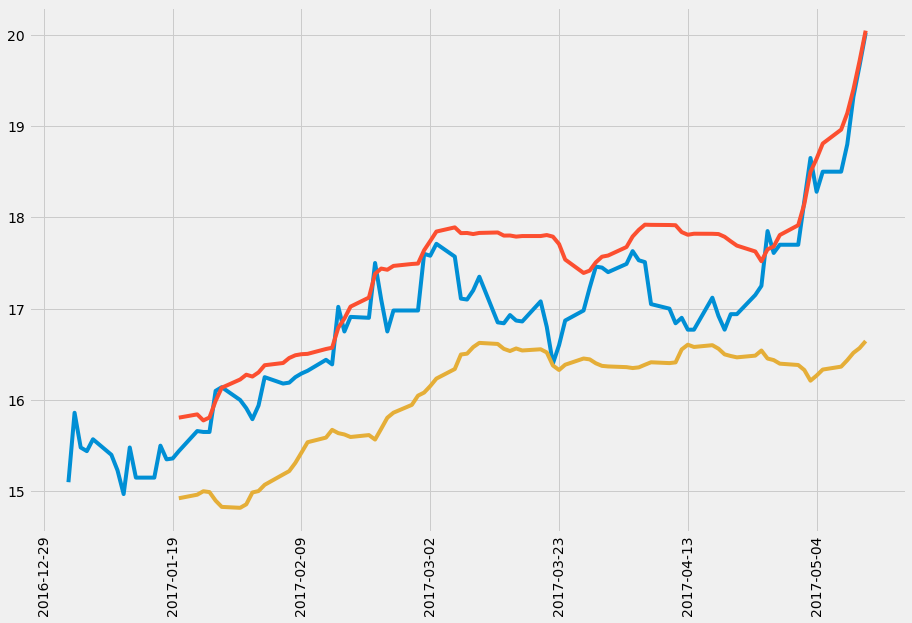

In [15]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, df_wege['Close']
         ,df_wege.Date, BBANDS(df_wege, n).UpperBollinger_15
         ,df_wege.Date, BBANDS(df_wege, n).LowerBollinger_15
        )

In [16]:
def STOK(df):
    """
    Stochastic oscillator %K
    """
    result = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    return (result)

In [17]:
def STO(df, n):
    """
    Stochastic oscillator %D
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    result = pd.Series(pd.ewma(SOk, span=n, min_periods=n - 1), name='SO%d_' + str(n))
    return (result)


In [18]:
def SMA(df, n):
    """
    Smoothed Moving Average
    """
    result = pd.rolling_mean(df['Close'], n, min_periods=n)
    return (result)


In [21]:
def EMA(df, n):
    """
    Exponential Moving Average
    """
    result=pd.Series(pd.ewma(df['Close'], span=n, min_periods=n - 1), name='EMA_' + str(n))
    #Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()
    return (result)


In [26]:
def MOM(df, n):
    """
    Momentum
    """
    result=pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
    return (result)



In [28]:
def ROC(df, n):
    """
    Rate of Change
    """
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    result = pd.Series(M / N, name='ROC_' + str(n))
    return (result)

In [36]:
def STDDEV(df, n):
    """
    Standard Deviation
    """
    result = pd.Series(pd.rolling_std(df['Close'], n), name='STD_' + str(n))
    return (result)

In [41]:
def KELCH(df, n):
    """
    Keltner Channel
    """
    KelChM = pd.Series(pd.rolling_mean((df['High'] + df['Low'] + df['Close']) / 3, n), name='KelChM_' + str(n))
    KelChU = pd.Series(pd.rolling_mean((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3, n), name='KelChU_' + str(n))
    KelChD = pd.Series(pd.rolling_mean((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3, n), name='KelChD_' + str(n))
    result = pd.DataFrame([KelChM, KelChU, KelChD]).transpose()
    return (result)

In [43]:
def CCI(df, n):
    """
    Commodity Channel Index
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    result = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name='CCI_' + str(n))
    return (result)

In [45]:
def EOM(df, n):
    """
    Ease of Movement
    """
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
    result = pd.Series(pd.rolling_mean(EoM, n), name='EoM_' + str(n))
    return (result)

In [47]:
def FORCE(df, n):
    """
    Force Index
    """
    result = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name='Force_' + str(n))
    return (result)

In [49]:
def Chaikin(df):
    """
    Chaikin Oscillator
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    result = pd.Series(pd.ewma(ad, span=3, min_periods=2) - pd.ewma(ad, span=10, min_periods=9), name='Chaikin')
    return (result)

In [52]:
def ACCDIST(df, n):
    """
    Accumulation/Distribution
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    result = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    return (result)

In [54]:
def TSI(df, r, s):
    """
    True Strength Index
    r = EMA smoothing period for momentum, typically 25
    s = EMA smoothing period for smoothed momentum, typically 13
    """
    M = pd.Series(df['Close'].diff(1))
    aM = abs(M)
    EMA1 = pd.Series(pd.ewma(M, span=r, min_periods=r - 1))
    aEMA1 = pd.Series(pd.ewma(aM, span=r, min_periods=r - 1))
    EMA2 = pd.Series(pd.ewma(EMA1, span=s, min_periods=s - 1))
    aEMA2 = pd.Series(pd.ewma(aEMA1, span=s, min_periods=s - 1))
    result = pd.Series(EMA2 / aEMA2, name='TSI_' + str(r) + '_' + str(s))
    return (result)

In [56]:
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4):
    """
    KST Oscillator
    """
    M = df['Close'].diff(r1 - 1)
    N = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M = df['Close'].diff(r2 - 1)
    N = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M = df['Close'].diff(r3 - 1)
    N = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M = df['Close'].diff(r4 - 1)
    N = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    result = pd.Series(pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4, name='KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))
    return (result)

In [58]:
def MassI(df):
    """
    Mass Index
    """
    Range = df['High'] - df['Low']
    EX1 = pd.ewma(Range, span=9, min_periods=8)
    EX2 = pd.ewma(EX1, span=9, min_periods=8)
    Mass = EX1 / EX2
    result = pd.Series(pd.rolling_sum(Mass, 25), name='Mass Index')
    return (result)

In [60]:
def MACD(df, n_fast, n_slow):
    """
    MACD, MACD Signal and MACD difference
    """
    EMAfast = pd.Series(pd.ewma(df['Close'], span=n_fast, min_periods=n_slow - 1))
    EMAslow = pd.Series(pd.ewma(df['Close'], span=n_slow, min_periods=n_slow - 1))
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_%d_%d' % (n_fast, n_slow))
    MACDsign = pd.Series(pd.ewma(MACD, span=9, min_periods=8), name='MACDsign_%d_%d' % (n_fast, n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_%d_%d' % (n_fast, n_slow))
    result = pd.DataFrame([MACD, MACDsign, MACDdiff]).transpose()
    return (result)

In [62]:
def TRIX(df, n):
    """
    Trix
    """
    EX1 = pd.ewma(df['Close'], span=n, min_periods=n - 1)
    EX2 = pd.ewma(EX1, span=n, min_periods=n - 1)
    EX3 = pd.ewma(EX2, span=n, min_periods=n - 1)
    i = 0
    ROC_l = [0]
    while i + 1 <= len(df) - 1:  # df.index[-1]:
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
        ROC_l.append(ROC)
        i = i + 1
    result = pd.Series(ROC_l, name='Trix_' + str(n))
    return (result)

In [63]:
TRIX(df_wege, n)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()


0     0.000000
1    -0.003272
2    -0.002834
3    -0.002445
4    -0.002106
5    -0.001814
6    -0.001533
7    -0.001239
8    -0.000953
9    -0.000663
10   -0.000452
11   -0.000296
12   -0.000151
13   -0.000033
14    0.000052
15    0.000042
16   -0.000008
17   -0.000097
18   -0.000202
19   -0.000325
20   -0.000438
21   -0.000556
22   -0.000709
23   -0.000846
24   -0.000953
25   -0.001032
26   -0.001056
27   -0.001028
28   -0.000935
29   -0.000833
        ...   
65         NaN
66         NaN
67         NaN
68         NaN
69         NaN
70         NaN
71         NaN
72         NaN
73         NaN
74         NaN
75         NaN
76         NaN
77         NaN
78         NaN
79         NaN
80         NaN
81         NaN
82         NaN
83         NaN
84         NaN
85         NaN
86         NaN
87         NaN
88         NaN
89         NaN
90         NaN
91         NaN
92         NaN
93         NaN
94         NaN
Name: Trix_15, dtype: float64

In [64]:
def ULTOSC(df):
    """
    Ultimate Oscillator
    """
    i = 0
    TR_l = [0]
    BP_l = [0]
    while i < len(df) - 1:  # df.index[-1]:
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR_l.append(TR)
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        BP_l.append(BP)
        i = i + 1
    result = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name='Ultimate_Osc')
    return (result)

In [65]:
ULTOSC(df_wege)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).sum()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).sum()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).sum()


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27    2.651067
28    2.909577
29    3.126355
        ...   
65    3.353174
66    3.779513
67    3.896458
68    4.049455
69    3.498312
70    4.147410
71    3.995285
72    3.684208
73    3.574229
74    3.413561
75    3.378897
76    3.790048
77    3.373223
78    3.428848
79    3.758998
80    3.842159
81    3.851269
82    3.666293
83    3.566018
84    3.620806
85    3.298897
86    3.280242
87    3.011112
88    2.935220
89    2.966188
90    2.797558
91    2.953282
92    2.869488
93    3.216648
94    2.988566
Name: Ultimate_Osc, dtype: float64